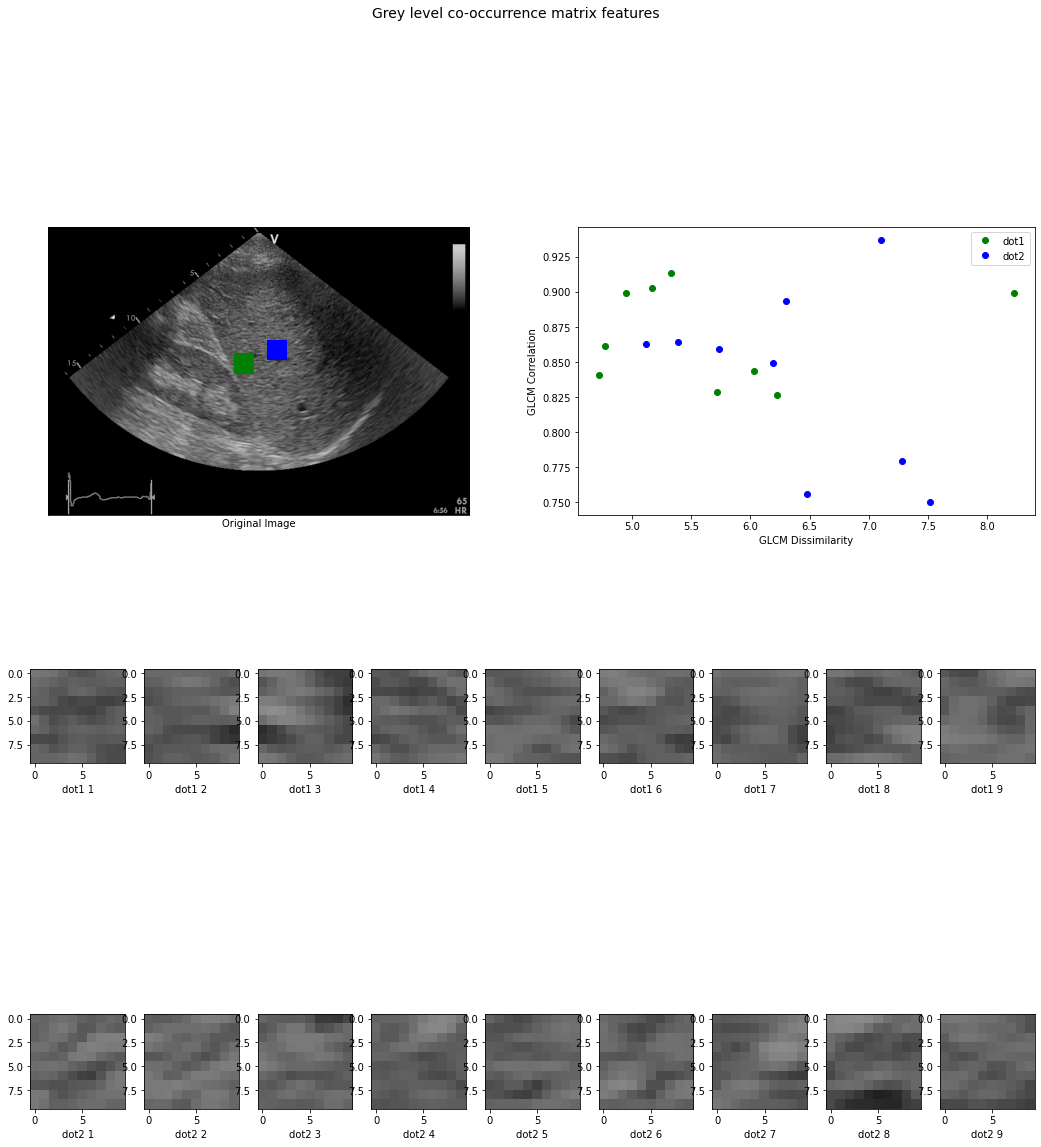

[[(5.722222222222222, 0.8289708185471482, 1), (4.955555555555555, 0.8990281203905205, 1), (8.222222222222229, 0.8993844638067703, 1), (6.2222222222222205, 0.8267594594574926, 1), (4.777777777777777, 0.861300182364575, 1), (5.166666666666666, 0.9026509412112907, 1), (4.722222222222223, 0.8405859346772524, 1), (5.333333333333333, 0.9134292377216559, 1), (6.033333333333331, 0.843372309123551, 1)], [(7.511111111111112, 0.7506283826933436, 2), (6.477777777777777, 0.7563364211816067, 2), (6.188888888888889, 0.8493743265468794, 2), (5.7333333333333325, 0.8595578816448809, 2), (5.388888888888888, 0.8639643900315969, 2), (7.27777777777778, 0.7793780572008356, 2), (6.3, 0.8936754943583711, 2), (7.100000000000002, 0.9369098254545485, 2), (5.122222222222225, 0.8631077301886072, 2)]]


In [2]:
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt

from skimage.feature import greycomatrix, greycoprops
from skimage import data
import numpy as np

from skimage import io, color, img_as_ubyte

from PIL import Image, ImageDraw

PATCH_SIZE = 10
# image = img_as_ubyte(img)


def contrast_feature(matrix_coocurrence):
	contrast = greycoprops(matrix_coocurrence, 'contrast')
	return "Contrast = ", contrast


def dissimilarity_feature(matrix_coocurrence):
	dissimilarity = greycoprops(matrix_coocurrence, 'dissimilarity')
	return "Dissimilarity = ", dissimilarity


def homogeneity_feature(matrix_coocurrence):
	homogeneity = greycoprops(matrix_coocurrence, 'homogeneity')
	return "Homogeneity = ", homogeneity


def energy_feature(matrix_coocurrence):
	energy = greycoprops(matrix_coocurrence, 'energy')
	return "Energy = ", energy


def correlation_feature(matrix_coocurrence):
	correlation = greycoprops(matrix_coocurrence, 'correlation')
	return "Correlation = ", correlation


def asm_feature(matrix_coocurrence):
	asm = greycoprops(matrix_coocurrence, 'ASM')
	return "ASM = ", asm



def do_stuff():
    # select some patches from dot1y areas of the image
    x1, y1 = (198, 294)
    x2, y2 = (200, 390)
    offset = 10

    dot1_locations = [(x1 - offset, y1 - offset), (x1 - offset, y1), (x1 - offset, y1 + offset),
                      (x1, y1 - offset), (x1, y1), (x1, y1 + offset),
                      (x1 + offset, y1 - offset), (x1 + offset, y1), (x1 + offset, y1 + offset)]
    dot1_patches = []
    for loc in dot1_locations:
        dot1_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                                loc[1]:loc[1] + PATCH_SIZE])

    # select some patches from dot2 areas of the image
    dot2_locations = [(x2 - offset, y2 - offset), (x2 - offset, y2), (x2 - offset, y2 + offset),
                      (x2, y2 - offset), (x2, y2), (x2, y2 + offset),
                      (x2 + offset, y2 - offset), (x2 + offset, y2), (x2 + offset, y2 + offset)]
    dot2_patches = []
    for loc in dot2_locations:
        dot2_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                                loc[1]:loc[1] + PATCH_SIZE])

    # compute some GLCM properties each patch

    xs = []
    ys = []
    
    
    
    for patch in (dot1_patches + dot2_patches):
        glcm = greycomatrix(patch, distances=[1], angles=[
            0, np.pi/4, 3*np.pi/4], levels=256,
                            symmetric=True, normed=True)
        xs.append(greycoprops(glcm, 'dissimilarity')[0, 0])
        ys.append(greycoprops(glcm, 'correlation')[0, 0])

    data.append(list(zip(xs[:len(dot1_patches)], ys[:len(dot1_patches)], [1] * len(dot1_patches))))
    data.append(list(zip(xs[len(dot1_patches):], ys[len(dot1_patches):], [2] * len(dot1_patches))))
    # create the figure
    fig = plt.figure(figsize=(18, 18))

    # display original image with locations of patches
    ax = fig.add_subplot(3, 2, 1)
    ax.imshow(image, cmap=plt.cm.gray,
            vmin=0, vmax=255)
    for (y, x) in dot1_locations:
        ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'gs')
    for (y, x) in dot2_locations:
        ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'bs')
    ax.set_xlabel('Original Image')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('image')

    # for each patch, plot (dissimilarity, correlation)
    ax = fig.add_subplot(3, 2, 2)
    ax.plot(xs[:len(dot1_patches)], ys[:len(dot1_patches)], 'go',
            label='dot1')
    ax.plot(xs[len(dot1_patches):], ys[len(dot1_patches):], 'bo',
            label='dot2')
    ax.set_xlabel('GLCM Dissimilarity')
    ax.set_ylabel('GLCM Correlation')
    ax.legend()

    # display the image patches
    for i, patch in enumerate(dot1_patches):
        ax = fig.add_subplot(3, len(dot1_patches), len(dot1_patches)*1 + i + 1)
        ax.imshow(patch, cmap=plt.cm.gray,
                vmin=0, vmax=255)
        ax.set_xlabel('dot1 %d' % (i + 1))

    for i, patch in enumerate(dot2_patches):
        ax = fig.add_subplot(3, len(dot2_patches), len(dot2_patches)*2 + i + 1)
        ax.imshow(patch, cmap=plt.cm.gray,
                vmin=0, vmax=255)
        ax.set_xlabel('dot2 %d' % (i + 1))


    # display the patches and plot
    fig.suptitle('Grey level co-occurrence matrix features', fontsize=14, y=1.05)
    plt.show()


data = []

img = io.imread('datasets/orig/10000/0/1_0_class0.png', as_gray=True)
image = img
do_stuff()


print(list(data))
